# 2-wymiarowy rozkład Normalny

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as stats
from scipy.stats import multivariate_normal

# Zadanie 
Proszę wygenerować próbkę z rozkładu Normalnego
$$
m = [0,0]
$$

oraz

$$
\Sigma = [[4.40, -2.75], [-2.75,  5.50]]
$$

In [3]:
mean1 = np.array([0, 0])
cov1 = np.array([[4.40, -2.75], [-2.75,  5.50]])
X1_rv=multivariate_normal(mean=mean1,cov=cov1)
X = X1_rv.rvs(1000)

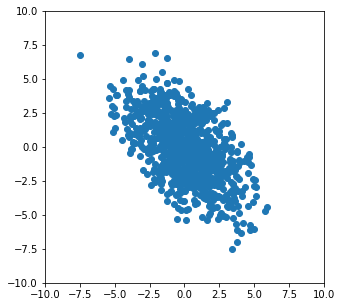

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.show()

# Zadanie 
Proszę policzyć średnią oraz macierz kowariancji próbki.

In [5]:
means = X.mean(axis=0)
cov = np.cov(X.T)

# Zadanie
Proszę zdefiniować zmienną losową o razkładzie zadanym na podstawie empirycznej średniej i kowariancji oraz narysować na jednym wykresie:

- próbkę
- poziomice rozkładu normalnego 

In [6]:
X2_rv=multivariate_normal(means, cov)

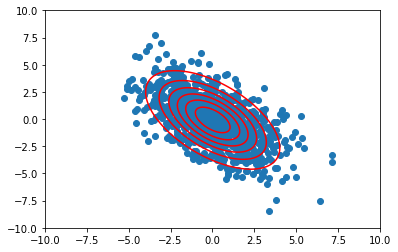

In [7]:
x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X, Y = np.meshgrid(x,y)
sample1 = X2_rv.rvs(1000)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
plt.scatter(sample1[:,0],sample1[:,1], zorder=1)
# plt.ylim(-4,4)
# plt.xlim(-4,4)
plt.contour(X,Y,X2_rv.pdf(pos), colors='red', zorder=5)
plt.show()

# Zadanie
Policz wektory i wartości własne macierzy kowariancji. Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

In [8]:
X3_rv=multivariate_normal(means, cov)

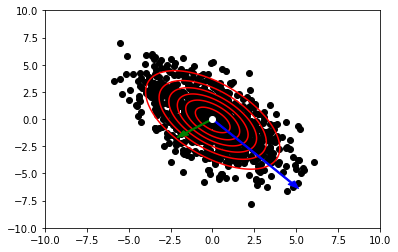

In [9]:
from numpy import linalg as LA

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
       return v
    return v / norm
# eigen vectors
eig_vals, eig_vectors = LA.eig(cov)
startpoint = [0,0]

x = np.linspace(-8,8,1000)
y = np.linspace(-8,8,1000)
X, Y = np.meshgrid(x,y)
sample1 = X3_rv.rvs(1000)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
lim = 10
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.scatter(sample1[:,0],sample1[:,1], zorder=1,c='#000000')
plt.scatter(0,0,zorder=15,c='#FFFFFF')

v1 = eig_vals[0]*normalize(eig_vectors[:,0])
v2 = eig_vals[1]*normalize(eig_vectors[:,1])

plt.arrow(*startpoint,*v1,color='green',zorder=10, width=0.1,head_width=0.5, head_length=0.7)
plt.arrow(*startpoint,*v2,color='blue',zorder=10, width=0.1,head_width=0.5, head_length=0.7)
plt.contour(X,Y,X2_rv.pdf(pos), colors='red', zorder=5)
plt.show()

# Zadanie 
Proszę wygenerować próbkę na kwadracie $[0,1] \times [0,1]$.
Następnie proszę policzyć średnią oraz macierz kowariancji próbki.

Narysuj na jednym wykresie

- próbkę
- poziomice rozkładu normalnego 
- wektory własne macierzy kowariancji 

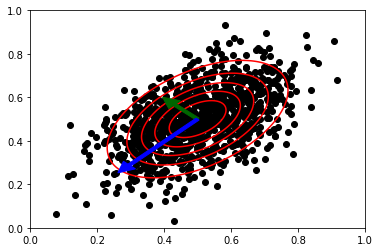

In [10]:
mean1 = np.array([0.5, 0.5])
standard_dev = 0.5/3.5    # according to 3 sigma rule, we want almost all values within [0,1] interval (within approx [-3sigma, 3sigma])
cov1 = np.array([[standard_dev**2,0.01], [0.01,  standard_dev**2]])   # variance = std_dev^2
X4_rv=multivariate_normal(mean1, cov1)
sample = X4_rv.rvs(1000)    # draw random samples
# nieliczne elementy wybiegajace poza kwadrat przywracamy do prawidlowego przedzialu [0,1]^2
sample[sample>1] -= np.random.uniform()
sample[sample<0] += np.random.uniform()

# obliczamy srednia oraz macierz kowariancji probki. Obliczamy wektory i wartosci wlasne macierzy kowariancji
# obliczamy wektory zaczepione do zaczepienia w punkcie startowym [0,0]
means = sample.mean(axis=0)
cov = np.cov(sample.T)
eig_vals, eig_vectors = LA.eig(cov)
v1 = eig_vals[0]*normalize(eig_vectors[:,0])
v2 = eig_vals[1]*normalize(eig_vectors[:,1])

# rysujemy probke
plt.scatter(sample[:,0],sample[:,1], zorder=1,c='#000000')

# ustalanie dziedziny na siatce (kwadrat [0,1])
x = np.linspace(0,1,1000)
y = np.linspace(0,1,1000)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

startpoint = [0.5,0.5]
#rysujemy poziomice z wektorami wlasnymi macierzy kowariancji
size = 0.05
plt.arrow(*startpoint,*(10*v1),color='#006600',zorder=10, width=size/4,head_width=size, head_length=size)
plt.arrow(*startpoint,*(10*v2),color='#0000FF',zorder=10, width=size/4,head_width=size, head_length=size)
plt.contour(X,Y,X4_rv.pdf(pos), colors='red', zorder=5)

plt.show()